In [7]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

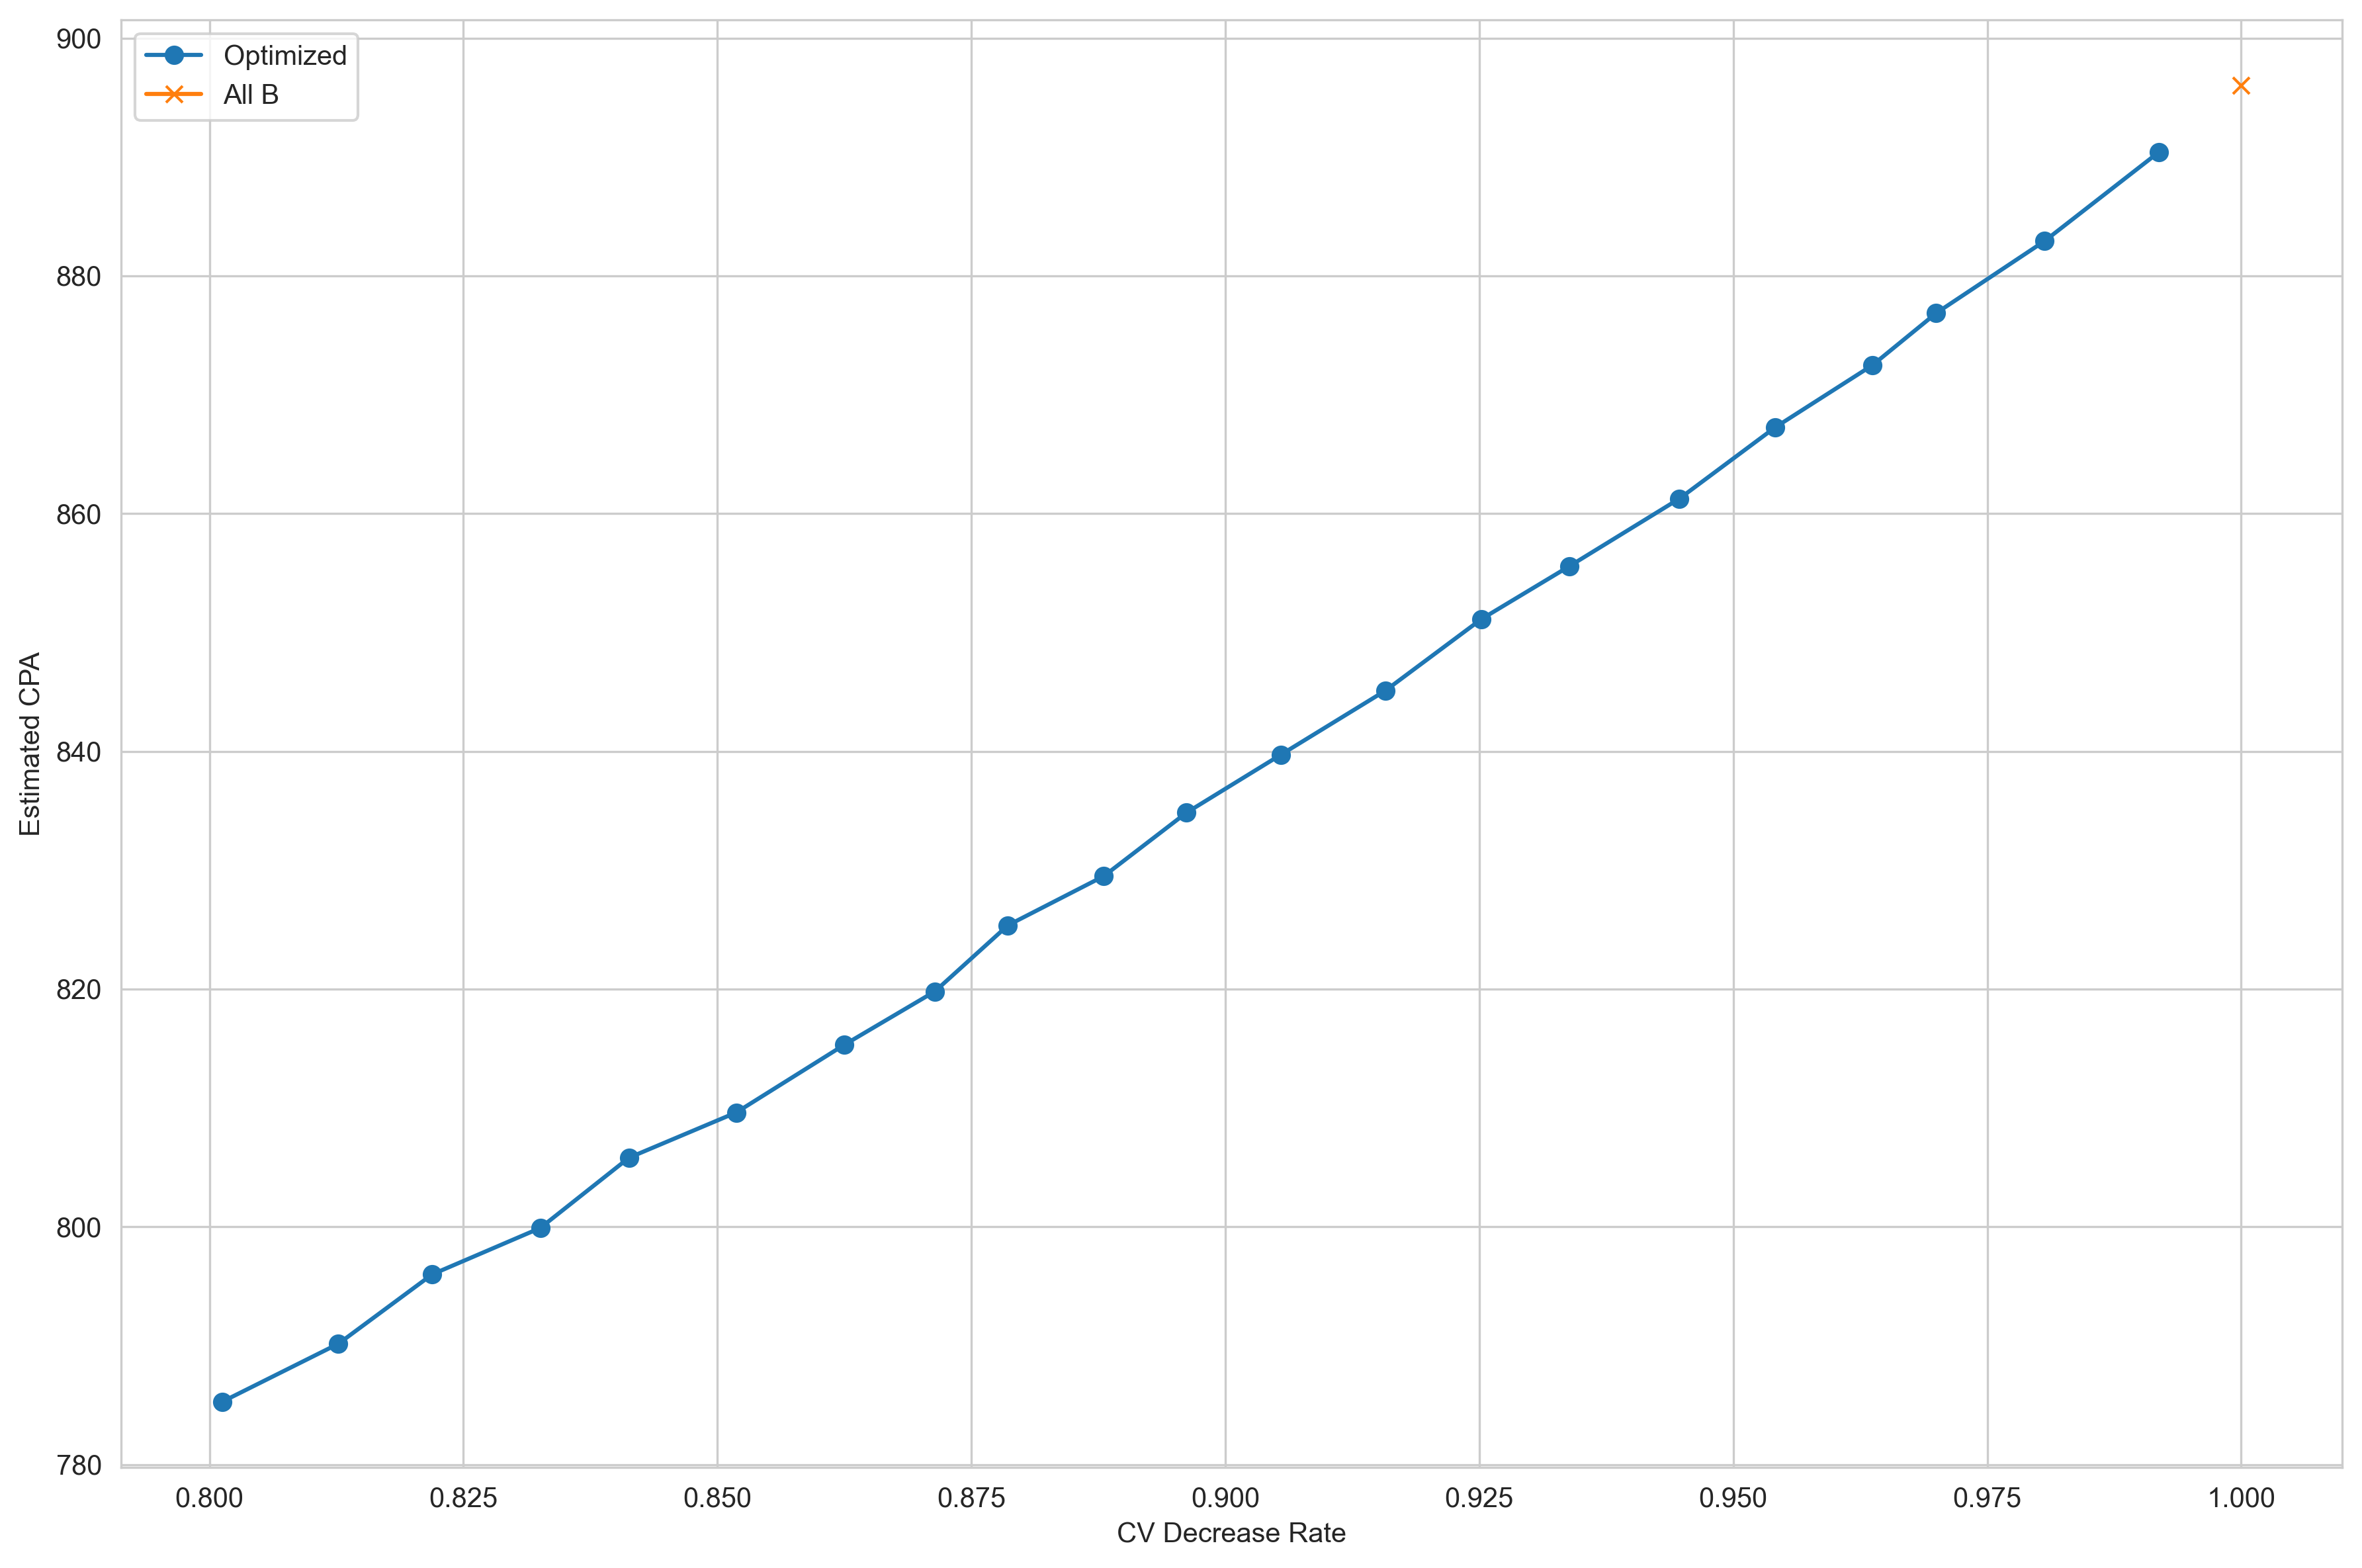

In [16]:
result_dir = Path("~/dev/coupon_assignment").expanduser().joinpath("result")

df = pd.read_csv(result_dir.joinpath("20251124_170831", "result.csv"))
df["loss_ratio_estimated"] = df["estimated_cv"] / df["estimated_cv_B"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), dpi=300)
plt.plot(df["loss_ratio_estimated"].values, df["estimated_cpa"].values, marker="o", label="Optimized")
plt.plot([1], [896], marker="x", label="All B")
plt.xlabel("CV Decrease Rate")
plt.ylabel("Estimated CPA")
plt.legend()
plt.tight_layout()
plt.savefig(result_dir.joinpath("20251124_170831", "loss_cpa_curve.png"))

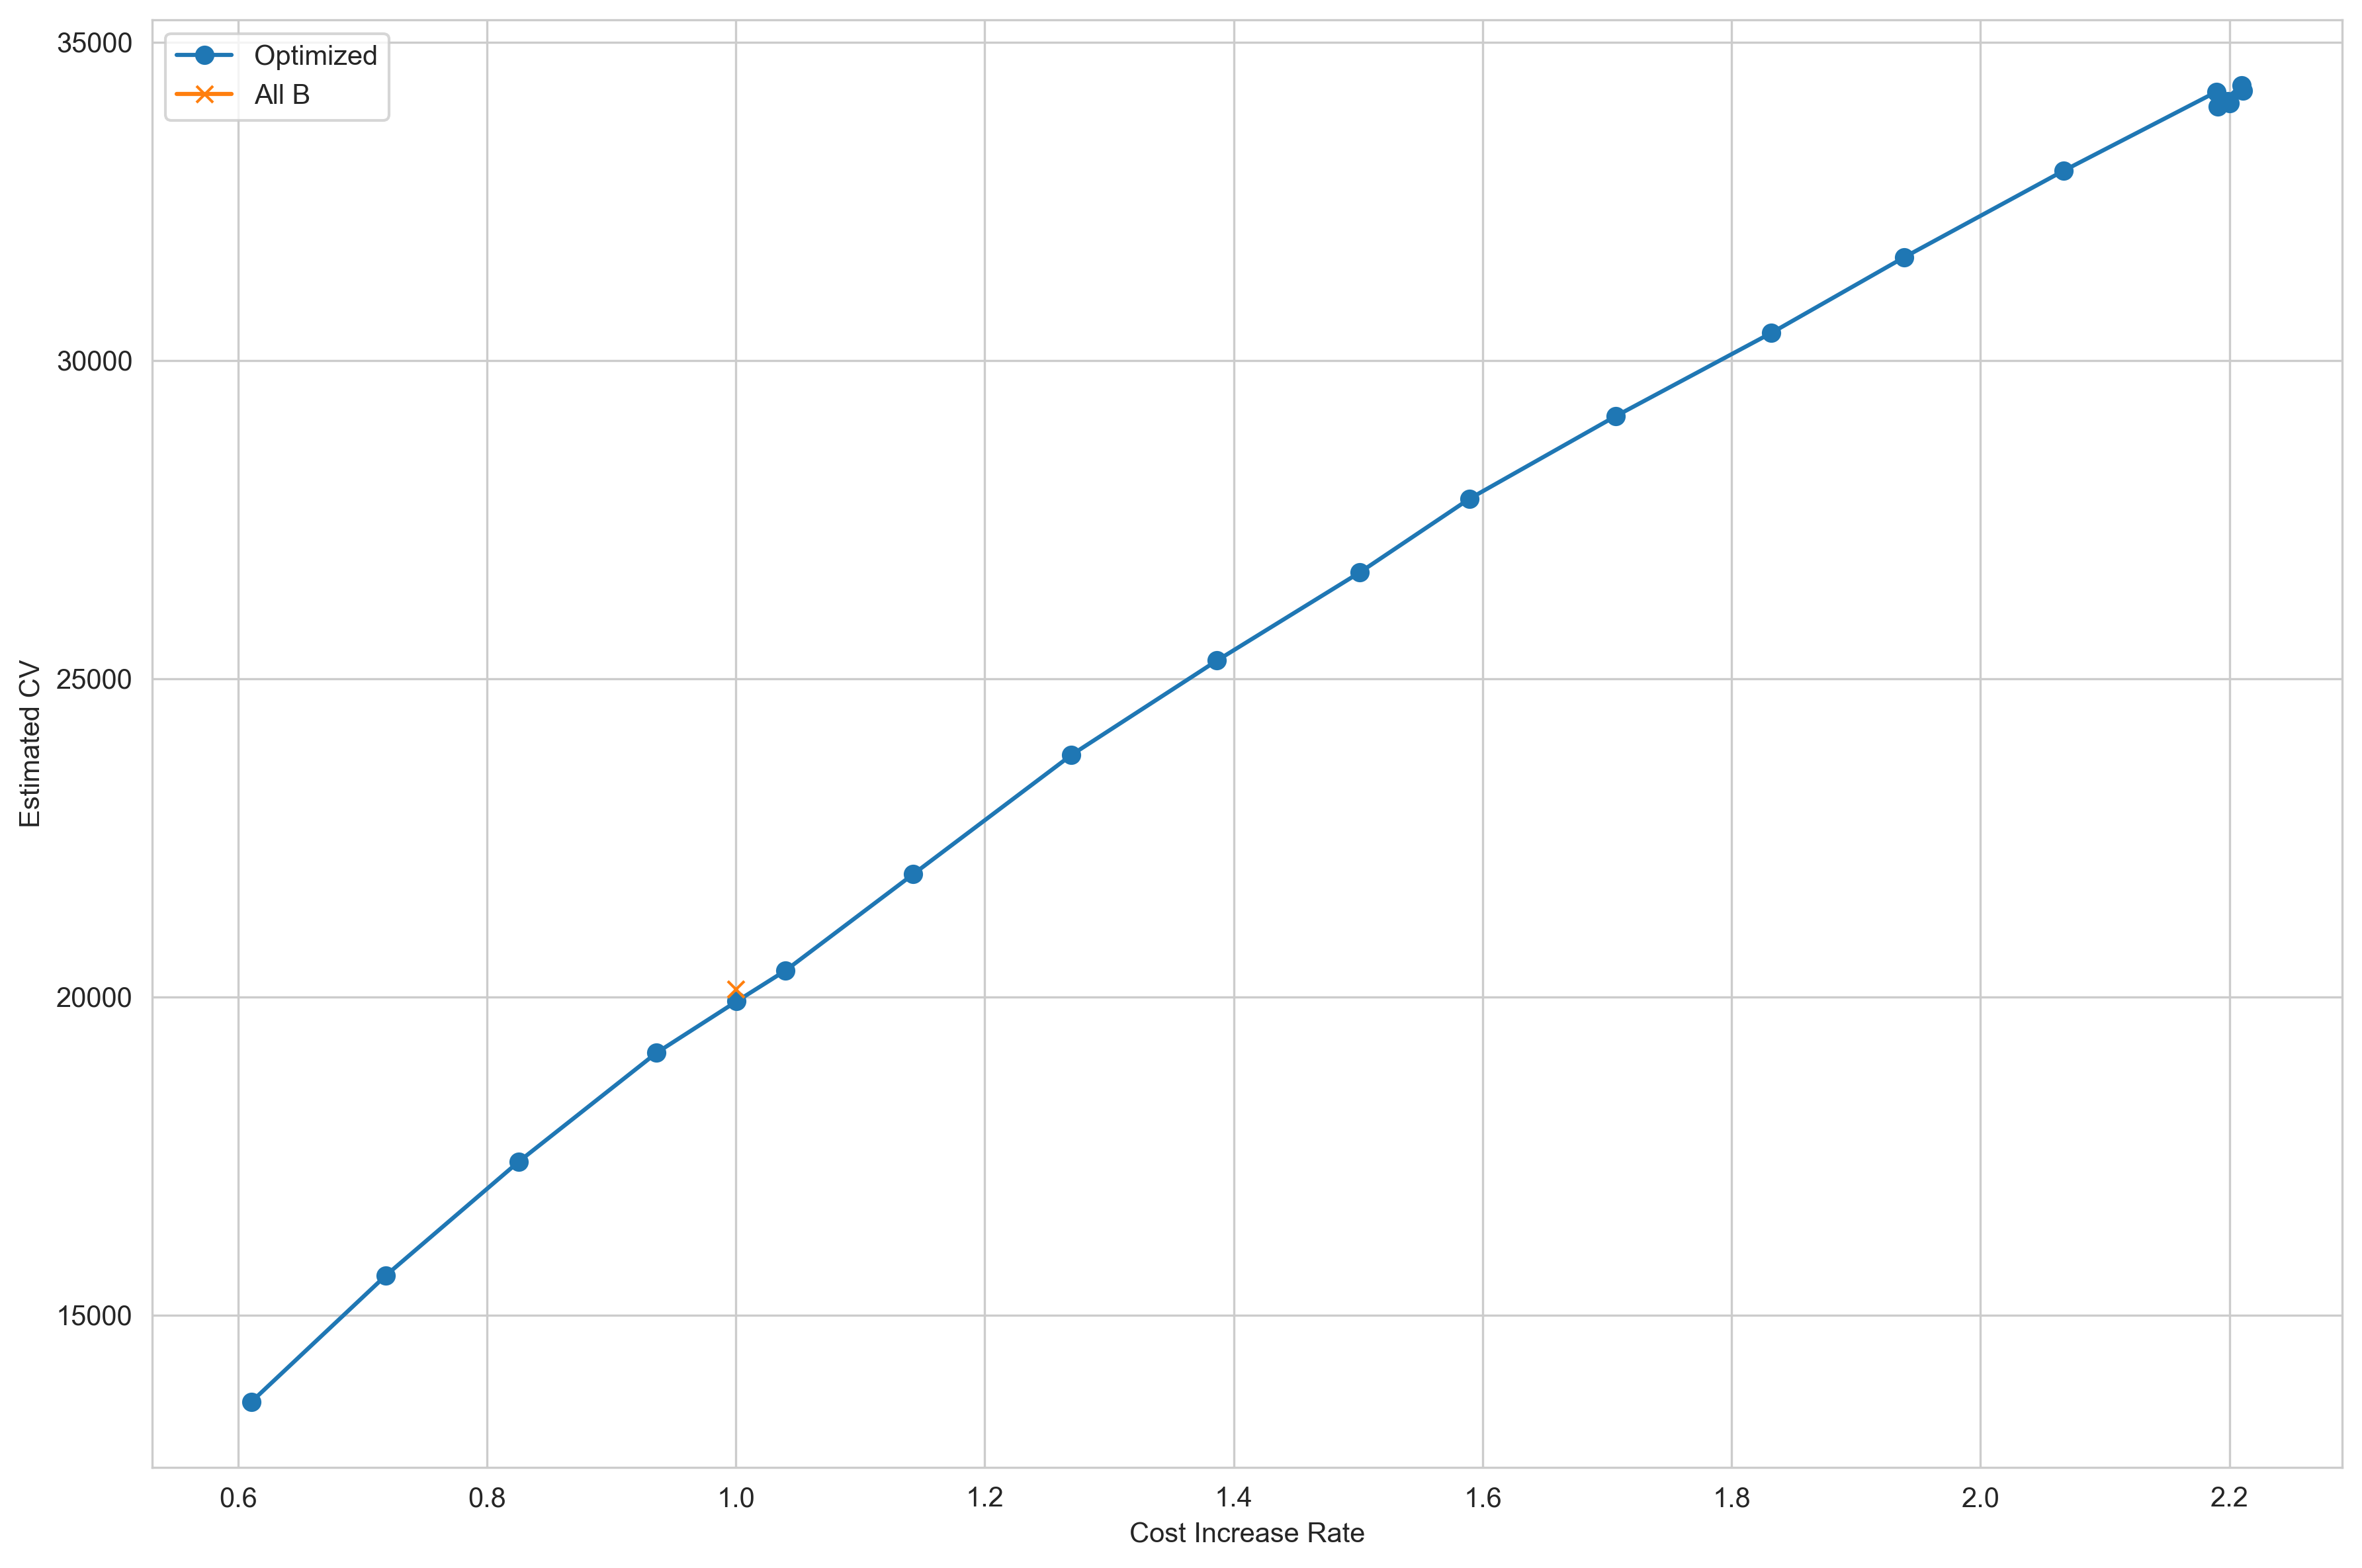

In [17]:
df = pd.read_csv(result_dir.joinpath("20251124_175536", "result.csv"))
df["cost_ratio_estimated"] = df["estimated_cost"] / df["estimated_cost_B"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), dpi=300)
plt.plot(df["cost_ratio_estimated"].values, df["estimated_cv"].values, marker="o", label="Optimized")
plt.plot([1], [20126], marker="x", label="All B")
plt.xlabel("Cost Increase Rate")
plt.ylabel("Estimated CV")
plt.legend()
plt.tight_layout()
plt.savefig(result_dir.joinpath("20251124_175536", "cost_cv_curve.png"))

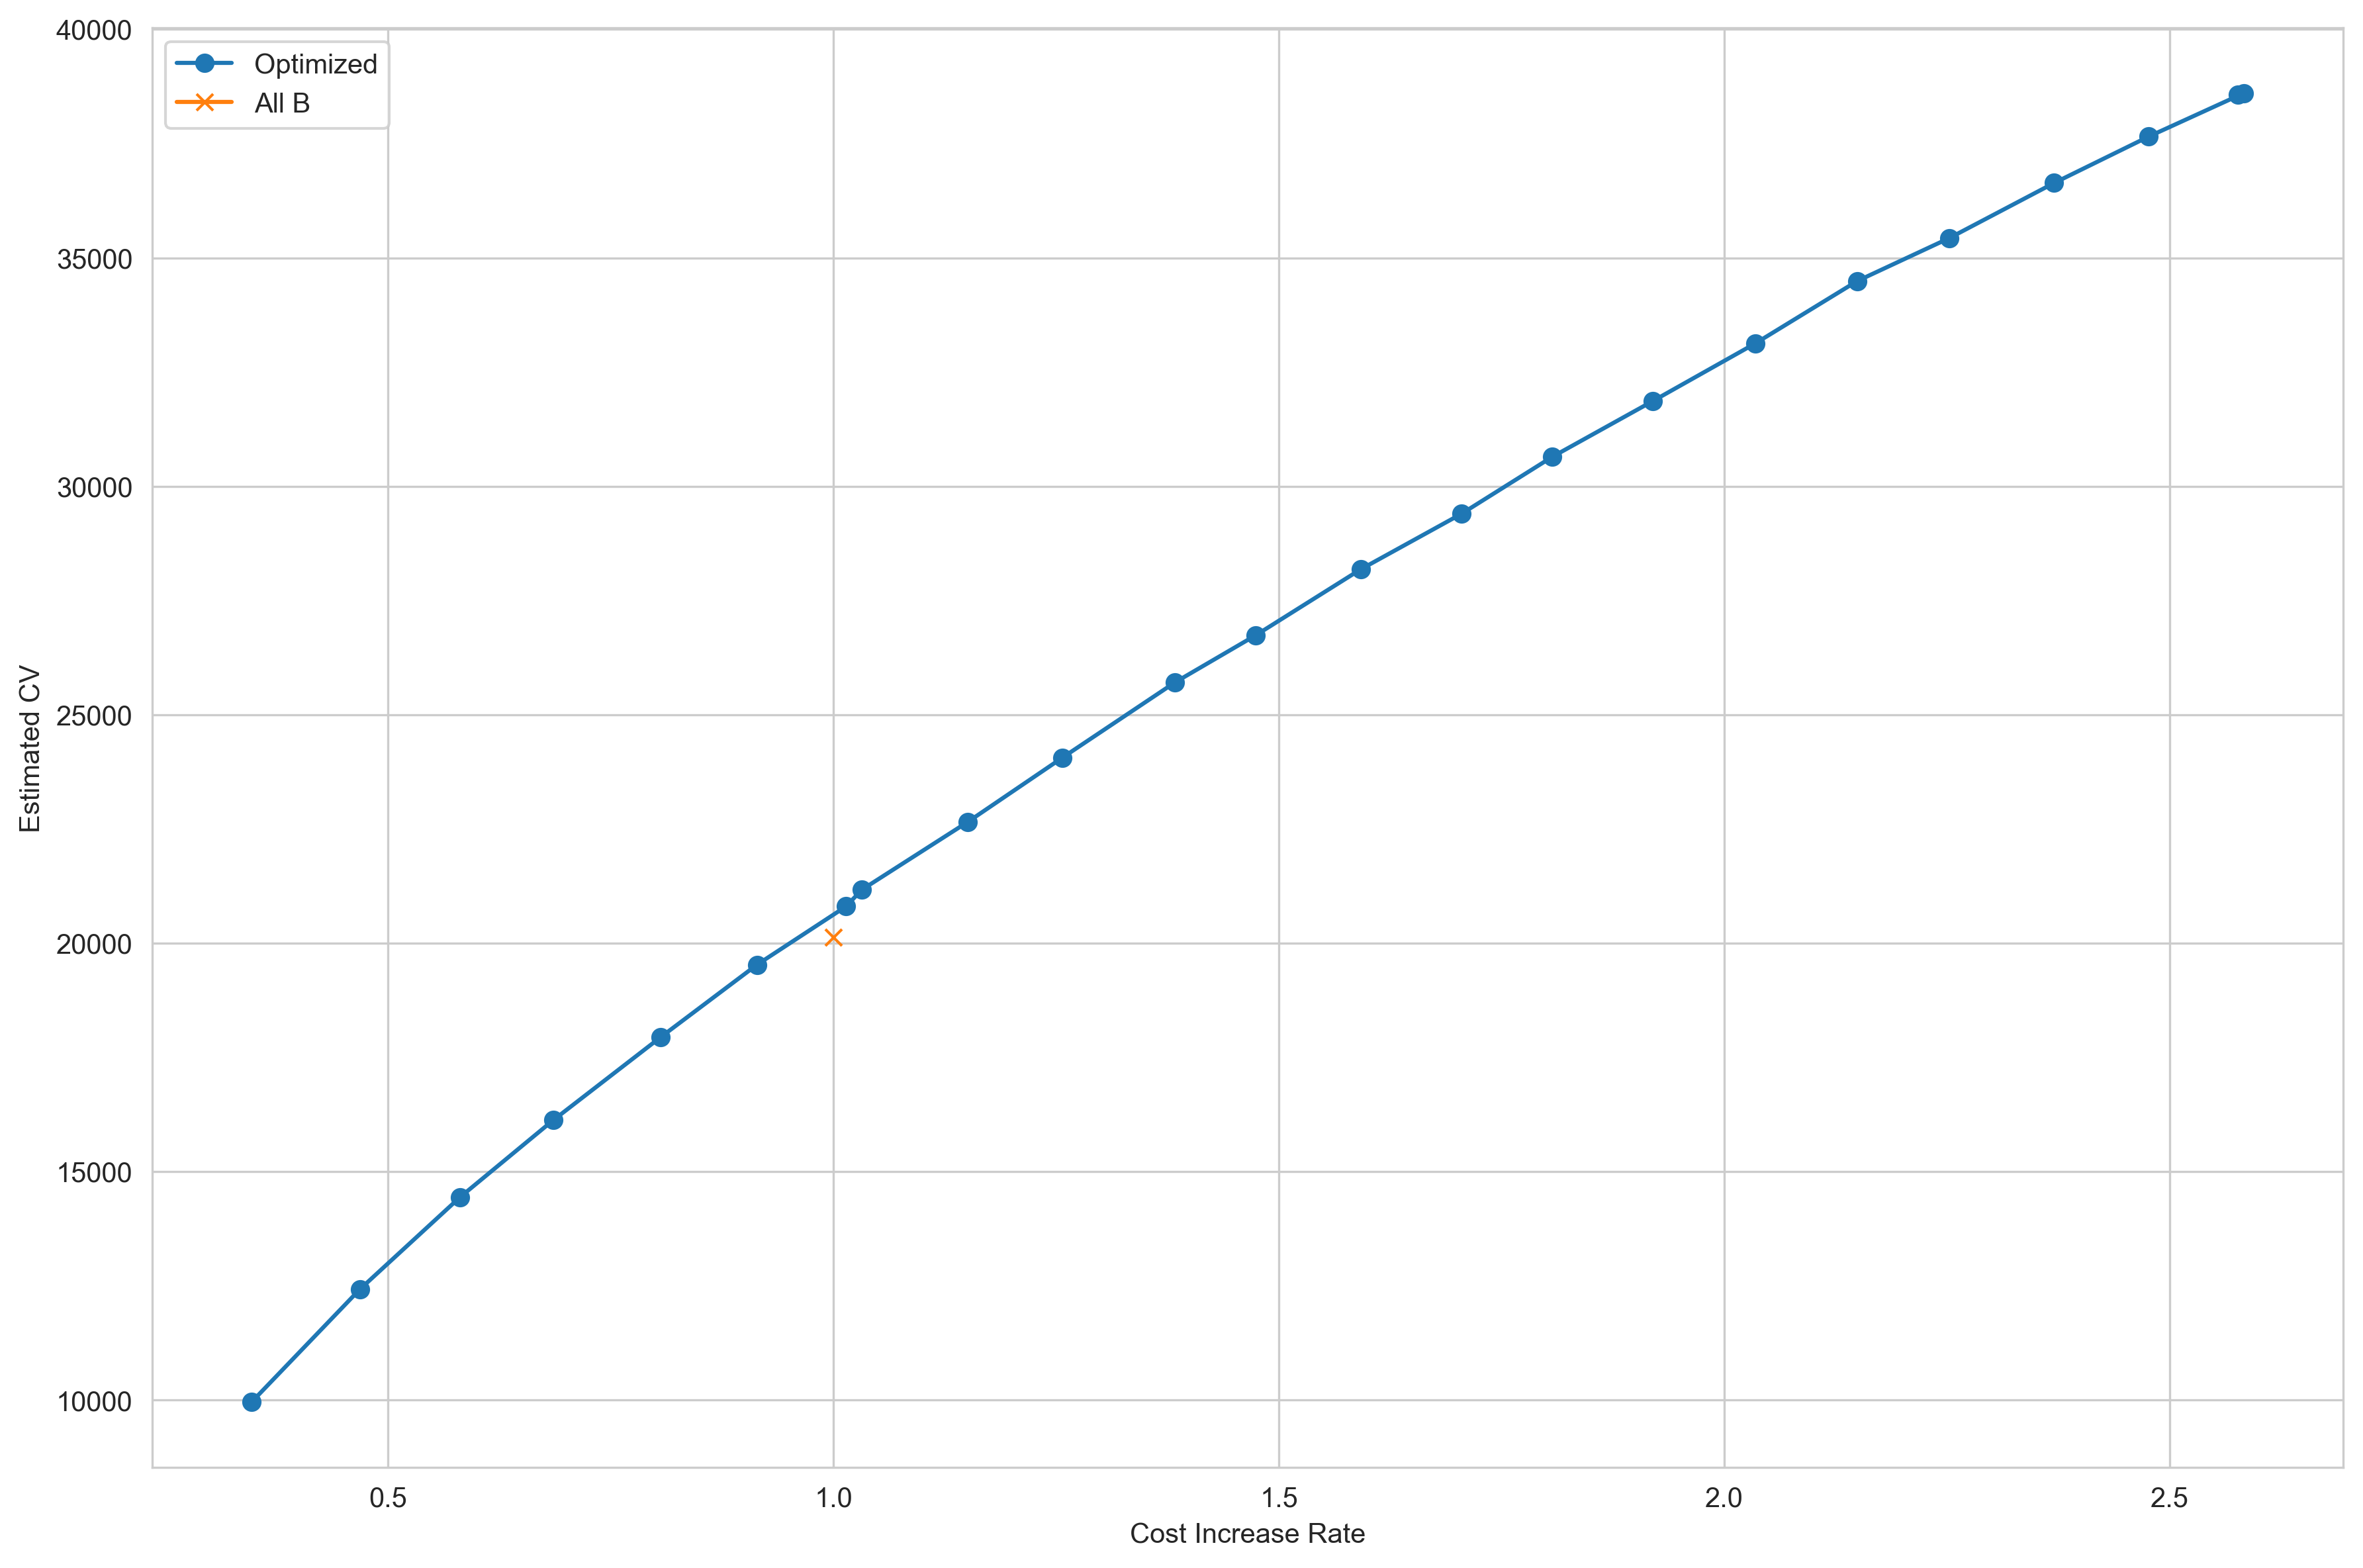

In [18]:
df = pd.read_csv(result_dir.joinpath("20251124_183124", "result.csv"))
df["cost_ratio_estimated"] = df["estimated_cost"] / df["estimated_cost_B"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), dpi=300)
plt.plot(df["cost_ratio_estimated"].values, df["estimated_cv"].values, marker="o", label="Optimized")
plt.plot([1], [20126], marker="x", label="All B")
plt.xlabel("Cost Increase Rate")
plt.ylabel("Estimated CV")
plt.legend()
plt.tight_layout()
plt.savefig(result_dir.joinpath("20251124_183124", "cost_cv_curve.png"))